# Desenrola Brasil — Análise Estatística

## O que é o Desenrola Brasil?

O **Desenrola Brasil** é um programa criado pelo **Governo Federal** com o objetivo de **ajudar milhões de brasileiros a saírem da inadimplência**, oferecendo a oportunidade de **negociar dívidas com condições especiais**, como descontos significativos e prazos mais flexíveis de pagamento.

Lançado em 2023, o programa foi pensado para **movimentar a economia, reduzir a inadimplência** e promover o **reingresso das pessoas no mercado de crédito**. Ele envolve uma parceria entre o governo, instituições financeiras e empresas credoras, funcionando como uma ponte para facilitar acordos de forma acessível.

### Como funciona?

O Desenrola Brasil é dividido principalmente em **duas faixas de atendimento**, com critérios específicos:

- **Faixa 1**: Destinada a pessoas com **renda mensal de até 2 salários mínimos** ou inscritas no **CadÚnico** (Cadastro Único para Programas Sociais). Nesta faixa, as dívidas bancárias e não bancárias (como contas de água, luz, varejo e telefonia) podem ser negociadas com **descontos de até 96%** e parcelamento em até **60 vezes**.
  
- **Faixa 2**: Foca em pessoas com **renda de até R$ 20 mil por mês**, para negociações diretas com os bancos, que oferecem condições especiais para regularização de débitos.

Além disso, o programa também possibilita a **limpeza do nome nos birôs de crédito**, o que pode abrir portas para novos financiamentos, cartões ou financiamentos habitacionais, por exemplo.

### Impacto

Desde seu lançamento, o Desenrola Brasil já impactou **milhões de brasileiros**, tendo registrado altos volumes de negociação nas primeiras semanas de funcionamento. O programa tem sido considerado uma das maiores iniciativas públicas de renegociação de dívidas da história do país.


# Importação das Bibliotecas

In [20]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import ticker

from matplotlib import cm
import seaborn as sns
import requests
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

pd.set_option('display.float_format', '{:,.2f}'.format)

import warnings
warnings.filterwarnings('ignore')



# Carregamento dos Dados

In [21]:
df = pd.read_csv("../data/dados_desenrola.csv", sep=";")

# Dicionário dos Dados

- **DATA_BASE:** Mês de referência no formato AAAAMM.
- **TIPO_DESENROLA:** Tipos 1 e 2, correspondendo às faixas 1 e 2 (¹), e tipo 3 (²).
- **UNIDADE_FEDERACAO:** Sigla da unidade da federação.
- **COD_CONGLOMERADO_FINANCEIRO:** Código do conglomerado financeiro.
- **NOME_CONGLOMERADO_FINANCEIRO:** Nome do conglomerado financeiro.
- **NUMERO_OPERACOES:** Número de operações renegociadas no mês de referência.
- **VOLUME_OPERACOES:** Somatório dos valores das operações após a concessão do desconto, em reais, renegociadas no mês de referência (casa decimal separada por vírgula).

# Visualização dos Dados

In [22]:
df.head()

,DATA_BASE,TIPO_DESENROLA,UNIDADE_FEDERACAO,COD_CONGLOMERADO_FINANCEIRO,NOME_CONGLOMERADO_FINANCEIRO,NUMERO_OPERACOES,VOLUME_OPERACOES
0,202309,2,AC,49906,BB,142,"1421991,10"
1,202309,2,AC,10045,BRADESCO,17,"94097,52"
2,202309,2,AC,49944,BTG PACTUAL,7,"37788,79"
3,202309,2,AC,51626,CAIXA ECONÔMICA FEDERAL,82,"247430,66"
4,202309,2,AC,51884,INTER,4,"12306,86"


# Informações dos Dados

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7848 entries, 0 to 7847
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   DATA_BASE                     7848 non-null   int64 
 1   TIPO_DESENROLA                7848 non-null   int64 
 2   UNIDADE_FEDERACAO             7848 non-null   object
 3   COD_CONGLOMERADO_FINANCEIRO   7848 non-null   int64 
 4   NOME_CONGLOMERADO_FINANCEIRO  7848 non-null   object
 5   NUMERO_OPERACOES              7848 non-null   int64 
 6   VOLUME_OPERACOES              7848 non-null   object
dtypes: int64(4), object(3)
memory usage: 429.3+ KB


- **Entradas:** 7.848 linhas  
- **Colunas:** 7  
- **Uso de memória:** ~429.3 KB

### Colunas

| Coluna                        | Tipo     | Descrição                                      |
|------------------------------|----------|------------------------------------------------|
| `DATA_BASE`                  | int64    | Data no formato AAAAMM                         |
| `TIPO_DESENROLA`             | int64    | Categoria da operação no programa              |
| `UNIDADE_FEDERACAO`          | object   | Estado (UF)                                    |
| `COD_CONGLOMERADO_FINANCEIRO`| int64    | Código da instituição financeira               |
| `NOME_CONGLOMERADO_FINANCEIRO`| object | Nome da instituição financeira                 |
| `NUMERO_OPERACOES`           | int64    | Quantidade de operações                        |
| `VOLUME_OPERACOES`           | object   | Valor das operações (precisa conversão p/ float) |

### Observações

- A coluna `VOLUME_OPERACOES` está como texto e precisa ser convertida para `float` (provável uso de "R$", "." e ",").
- A coluna `DATA_BASE` pode ser convertida para `datetime` para facilitar análises temporais.
- Nenhuma coluna contém valores nulos.


# Alteração nos tipos dos Dados

**Cópia de df**

In [24]:
df2 = df.copy()

**DATA_BASE**

In [25]:
# 1. Garantir que a coluna seja string com 6 dígitos
df2['DATA_BASE'] = df2['DATA_BASE'].astype(str).str.zfill(6)

# 2. Converter para datetime com ano e mês
df2['DATA_FORMATADA'] = pd.to_datetime(df2['DATA_BASE'], format='%Y%m', errors='coerce')

print(df2[['DATA_BASE', 'DATA_FORMATADA']].drop_duplicates().head(10))
print(df2['DATA_FORMATADA'].dtype)  # Deve ser datetime64[ns]



     DATA_BASE DATA_FORMATADA
0       202309     2023-09-01
220     202310     2023-10-01
827     202311     2023-11-01
1524    202312     2023-12-01
2209    202401     2024-01-01
2836    202402     2024-02-01
3372    202403     2024-03-01
3845    202404     2024-04-01
4238    202405     2024-05-01
4685    202406     2024-06-01
datetime64[ns]


In [26]:
# Excluir a coluna DATA_BASE
df2.drop(columns='DATA_BASE', inplace=True)

**VOLUME_OPERACOES**

In [27]:
df2['VOLUME_OPERACOES'] = df2['VOLUME_OPERACOES'].str.replace(',', '.').astype(float)

# Retrato Estatístico da População Endividada

## Quem são os brasileiros mais endividados segundo a base?

**Frequência por cada TIPO_DESENROLA agrupada com a contagem de NUMERO_OPERACOES e soma de VOLUME_OPERACOES**

In [28]:
df_grouped = df2.groupby(['TIPO_DESENROLA']) \
                .agg({
                    'NUMERO_OPERACOES': 'count',
                    'VOLUME_OPERACOES': 'sum',
                }) \
                .reset_index()

df_grouped

,TIPO_DESENROLA,NUMERO_OPERACOES,VOLUME_OPERACOES
0,1,4773,"1,980,550,182.57"
1,2,2244,"2,215,514,863.28"
2,3,831,"2,281,378,765.87"


- O **Tipo 1** tem o maior número de operações, mas representa o menor volume financeiro.
- O **Tipo 3** tem o menor número de operações, porém o maior volume movimentado.
- Isso sugere que cada tipo de operação atende perfis diferentes de dívida, com estratégias específicas dentro do programa.


O programa **Desenrola Brasil** está estruturado para lidar com diferentes faixas de endividamento. A análise por tipo mostra a abrangência da iniciativa tanto em **quantidade de pessoas beneficiadas** quanto em **valor financeiro renegociado**.


## Qual a média, mediana e desvio padrão?

In [29]:
df_estatisticas = df2.groupby('TIPO_DESENROLA').agg({
    'NUMERO_OPERACOES': ['mean', 'median', 'std'],
    'VOLUME_OPERACOES': ['mean', 'median', 'std']
}).reset_index()

df_estatisticas

TIPO_DESENROLA NUMERO_OPERACOES                 VOLUME_OPERACOES             \
                             mean median      std             mean     median   
0              1           399.24  22.00 1,354.78       414,948.71  14,939.22   
1              2           237.41  14.50 1,587.46       987,306.09  63,730.52   
2              3            72.84  16.00   225.78     2,745,341.48 484,222.69   

                 
            std  
0  1,438,309.60  
1  6,137,275.14  
2 11,368,921.69

- **Tipo 1**:
  - Alta quantidade média de operações (399), mas com mediana muito baixa (22).
  - Volume financeiro médio de R$ 414 mil, mas mediana de apenas R$ 14 mil.
  - Forte indício de concentração em valores pequenos com poucos valores muito altos.

- **Tipo 2**:
  - Média menor que o Tipo 1, mas com desvio padrão ainda maior, indicando dispersão elevada.
  - Volume médio de quase R$ 1 milhão, mas mediana de R$ 63 mil — novamente sugerindo assimetria.

- **Tipo 3**:
  - Poucas operações (média de 72), com mediana próxima (16) e menor dispersão relativa.
  - Volume financeiro médio de R$ 2,7 milhões, com mediana de R$ 484 mil — ainda há variação, mas mais consistente.

Os dados mostram que os diferentes tipos de operação (`TIPO_DESENROLA`) atendem **perfis muito distintos de endividamento**:

- **Tipo 1** - muitas renegociações pequenas.
- **Tipo 2** - valores medianos com maior dispersão.
- **Tipo 3** - poucas renegociações de valor muito alto.

Essa análise ajuda a entender a **estratégia do programa Desenrola Brasil** em atuar sobre diferentes faixas de dívida.


## Mapa por região/estado

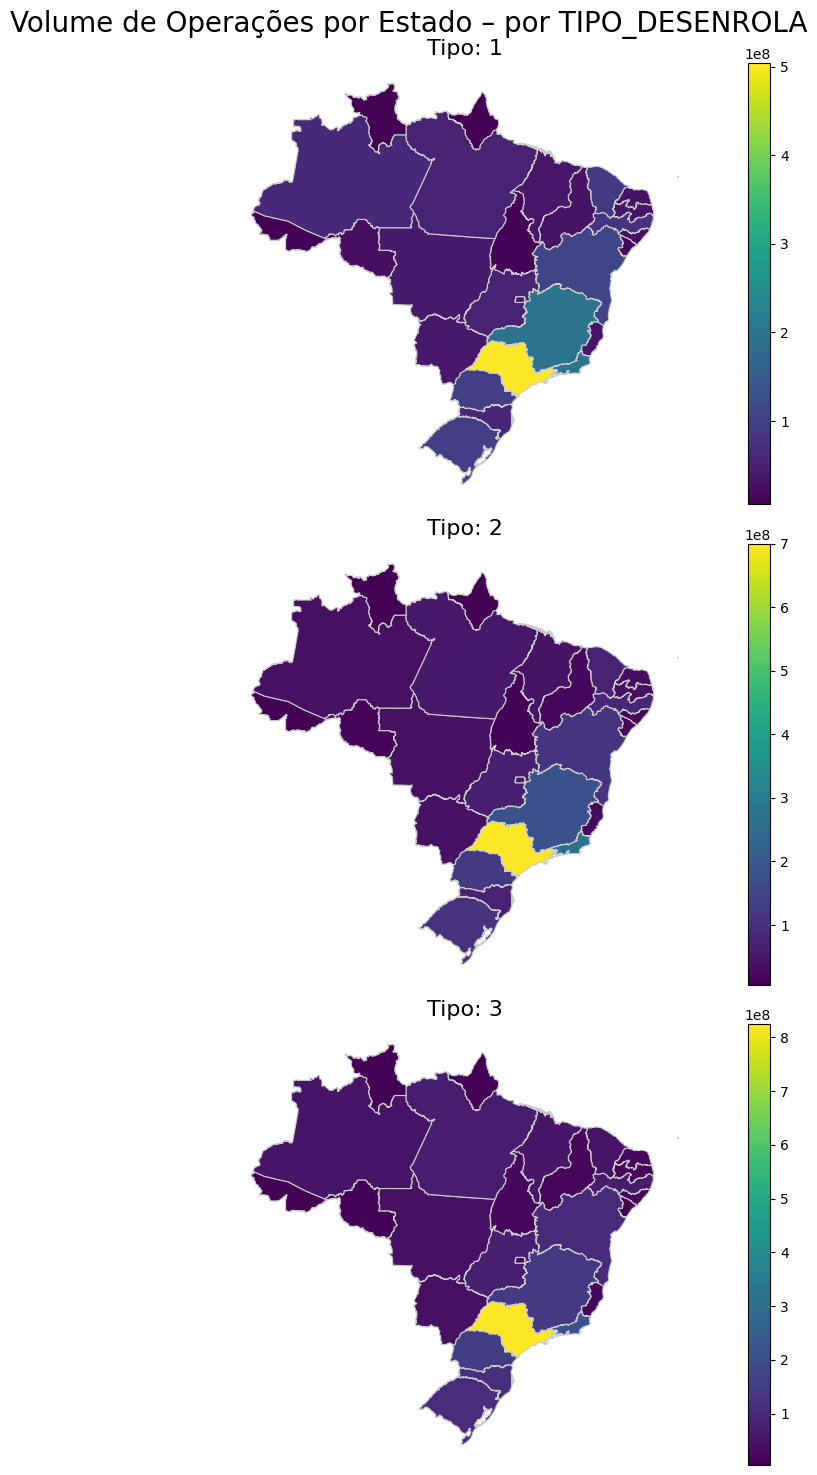

In [30]:
# 1. Carregar GeoJSON
geojson_url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
geojson = requests.get(geojson_url).json()
gdf_estados = gpd.GeoDataFrame.from_features(geojson["features"])

# 2. Renomear coluna para fazer o merge
gdf_estados.rename(columns={"name": "ESTADO"}, inplace=True)

# 3. Agrupar os dados (usando seu DataFrame `df2`)
df_estado_tipo = df2.groupby(['UNIDADE_FEDERACAO', 'TIPO_DESENROLA']).agg({
    'VOLUME_OPERACOES': 'sum'
}).reset_index()

# 4. Mapear siglas para nomes completos
sigla_para_nome = {
    'AC': 'Acre', 'AL': 'Alagoas', 'AP': 'Amapá', 'AM': 'Amazonas',
    'BA': 'Bahia', 'CE': 'Ceará', 'DF': 'Distrito Federal', 'ES': 'Espírito Santo',
    'GO': 'Goiás', 'MA': 'Maranhão', 'MT': 'Mato Grosso', 'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais', 'PA': 'Pará', 'PB': 'Paraíba', 'PR': 'Paraná',
    'PE': 'Pernambuco', 'PI': 'Piauí', 'RJ': 'Rio de Janeiro', 'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul', 'RO': 'Rondônia', 'RR': 'Roraima', 'SC': 'Santa Catarina',
    'SP': 'São Paulo', 'SE': 'Sergipe', 'TO': 'Tocantins'
}

df_estado_tipo['ESTADO'] = df_estado_tipo['UNIDADE_FEDERACAO'].map(sigla_para_nome)

# 5. Plotar um mapa para cada tipo
tipos = df_estado_tipo['TIPO_DESENROLA'].unique()
n = len(tipos)
fig, axs = plt.subplots(nrows=n, figsize=(10, 5 * n))

if n == 1:
    axs = [axs]

for i, tipo in enumerate(tipos):
    ax = axs[i]
    df_tipo = df_estado_tipo[df_estado_tipo['TIPO_DESENROLA'] == tipo]

    # Merge com GeoDataFrame
    gdf_merged = gdf_estados.merge(df_tipo, on='ESTADO', how='left')

    gdf_merged.plot(column='VOLUME_OPERACOES',
                    cmap='viridis',
                    linewidth=0.8,
                    edgecolor='0.8',
                    legend=True,
                    ax=ax)
    ax.set_title(f"Tipo: {tipo}", fontsize=16)
    ax.axis('off')

plt.suptitle('Volume de Operações por Estado – por TIPO_DESENROLA', fontsize=20)
plt.tight_layout()
plt.savefig("mapa_estatico_desenrola.png", dpi=300)
plt.show()


- SP, RJ, MG são os estados que mais concentram o Volume de Operações.
- SP é disparado com a maior concentração entre todos os 3 tipos de TIPO_DESENROLA.

## Número de Operações por Estado e Tipo Desenrola

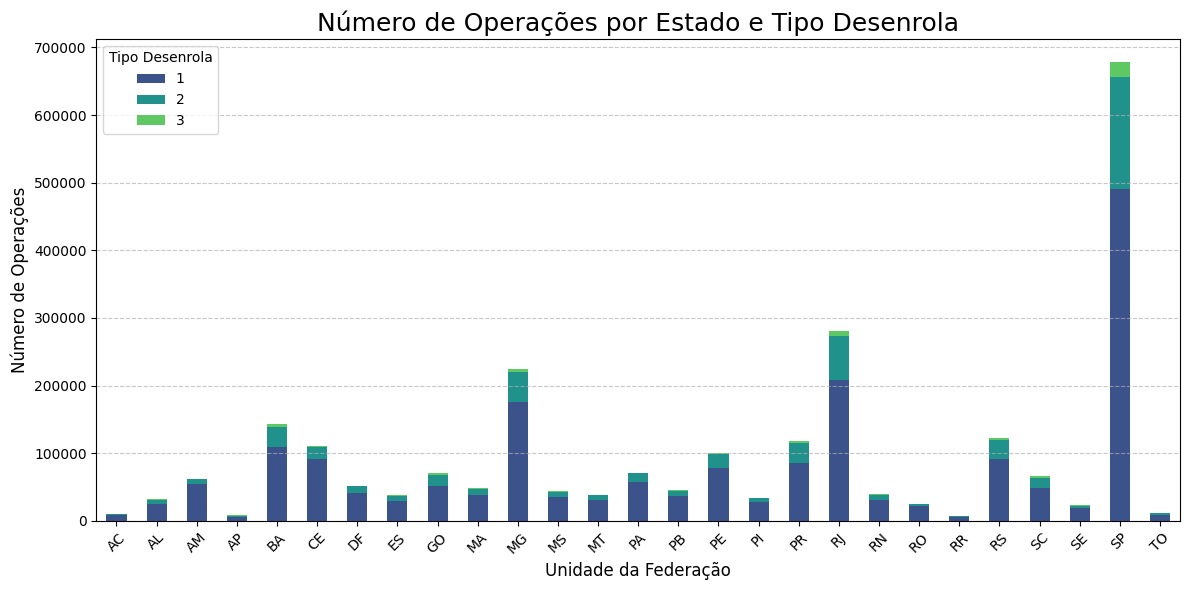

In [31]:
# Agrupar por estado e tipo
df_grouped = df2.groupby(['UNIDADE_FEDERACAO', 'TIPO_DESENROLA'])['NUMERO_OPERACOES'].sum().reset_index()

# Pivotar para barras empilhadas
pivot_df = df_grouped.pivot(index='UNIDADE_FEDERACAO', columns='TIPO_DESENROLA', values='NUMERO_OPERACOES').fillna(0)

# Cores diferentes para os tipos
colors = sns.color_palette("viridis", n_colors=pivot_df.shape[1])

# Plot
pivot_df.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))

# Personalização
plt.title('Número de Operações por Estado e Tipo Desenrola', fontsize=18)
plt.xlabel('Unidade da Federação', fontsize=12)
plt.ylabel('Número de Operações', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo Desenrola', title_fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


- As maiores operações foram em SP totalmente isolado entre 3 tipos de desenrola.

## Volume de Operações por Estado e Tipo Desenrola

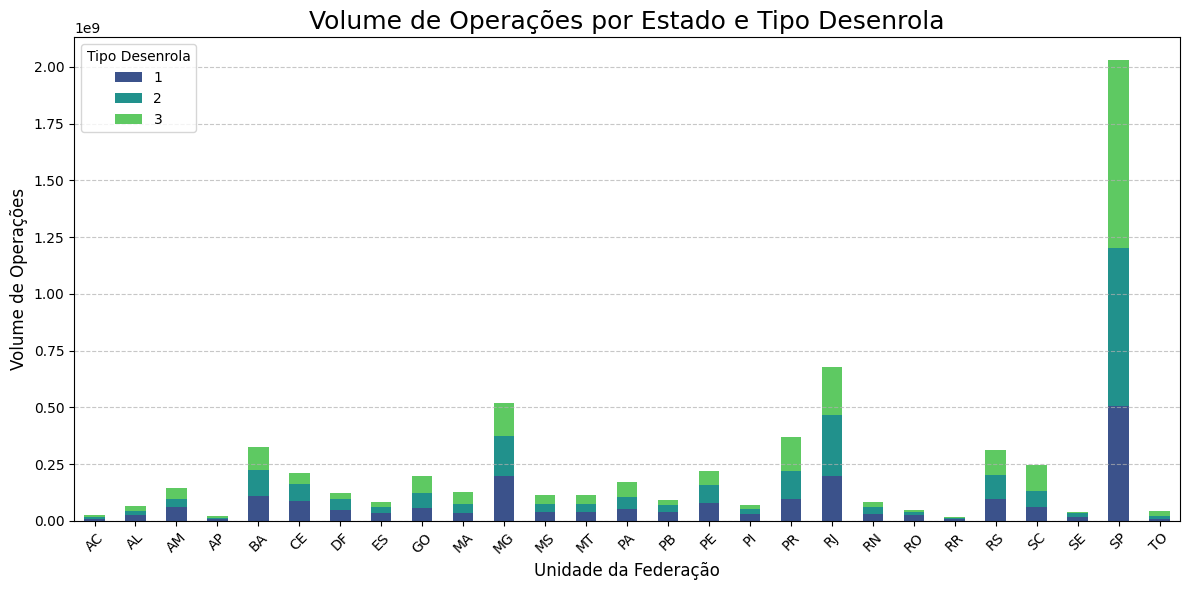

In [32]:
# Agrupar por estado e tipo
df_grouped = df2.groupby(['UNIDADE_FEDERACAO', 'TIPO_DESENROLA'])['VOLUME_OPERACOES'].sum().reset_index()

# Pivotar para barras empilhadas
pivot_df = df_grouped.pivot(index='UNIDADE_FEDERACAO', columns='TIPO_DESENROLA', values='VOLUME_OPERACOES').fillna(0)

# Cores diferentes para os tipos
colors = sns.color_palette("viridis", n_colors=pivot_df.shape[1])

# Plot
pivot_df.plot(kind='bar', stacked=True, color=colors, figsize=(12, 6))

# Personalização
plt.title('Volume de Operações por Estado e Tipo Desenrola', fontsize=18)
plt.xlabel('Unidade da Federação', fontsize=12)
plt.ylabel('Volume de Operações', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo Desenrola', title_fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


- Mesma situação em volume de operações.

## Volume de Operações por Data e Tipo Desenrola

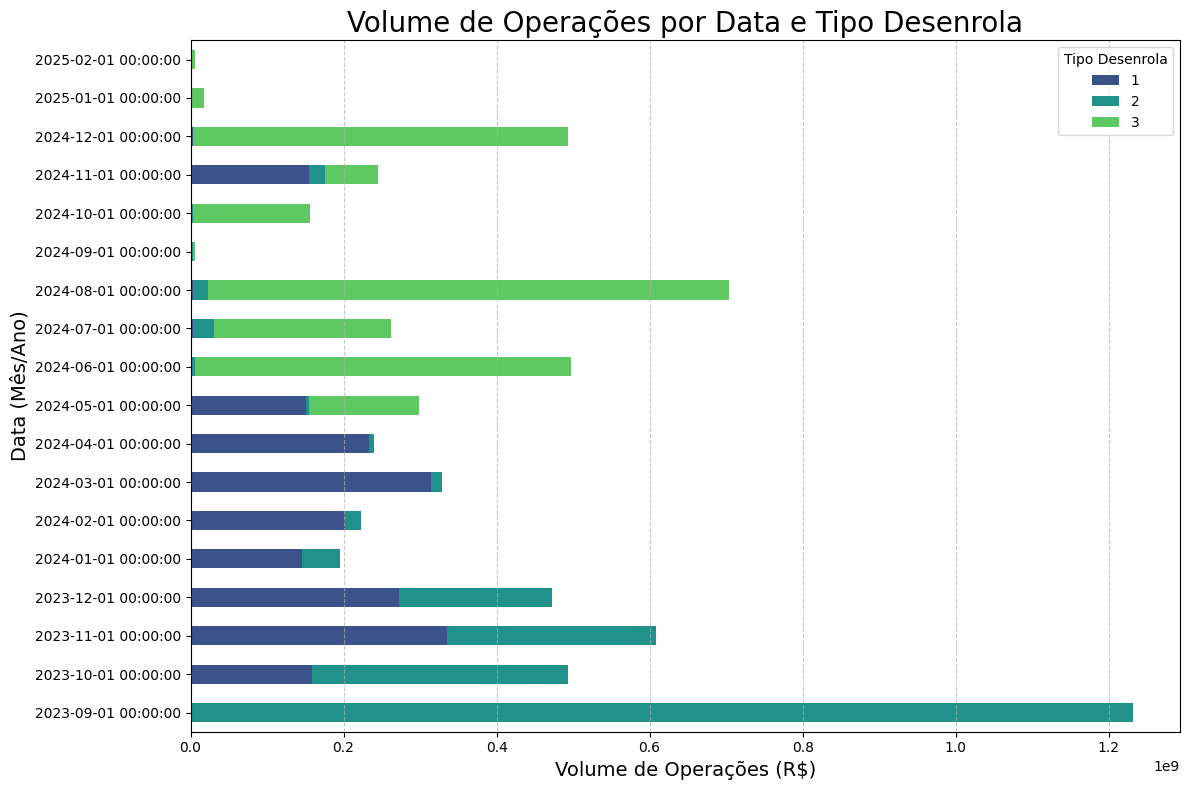

In [33]:
# Agrupar por data e tipo
df_grouped = df2.groupby(['DATA_FORMATADA', 'TIPO_DESENROLA'])['VOLUME_OPERACOES'].sum().reset_index()

# Pivotar para gráfico
pivot_df = df_grouped.pivot(index='DATA_FORMATADA', columns='TIPO_DESENROLA', values='VOLUME_OPERACOES').fillna(0)

# Paleta de cores
colors = sns.color_palette("viridis", n_colors=pivot_df.shape[1])

# Plot horizontal
pivot_df.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

# Personalização
plt.title('Volume de Operações por Data e Tipo Desenrola', fontsize=20)
plt.ylabel('Data (Mês/Ano)', fontsize=14)
plt.xlabel('Volume de Operações (R$)', fontsize=14)
plt.legend(title='Tipo Desenrola', title_fontsize=10)

# Estilo
plt.yticks(rotation=0)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar gráfico
plt.show()


- No início do programa em 09-2023, foi onde teve o maior índice de volume de transações.

## Clusterização

- Criação de Clusters para uma melhor Análise Exploratória

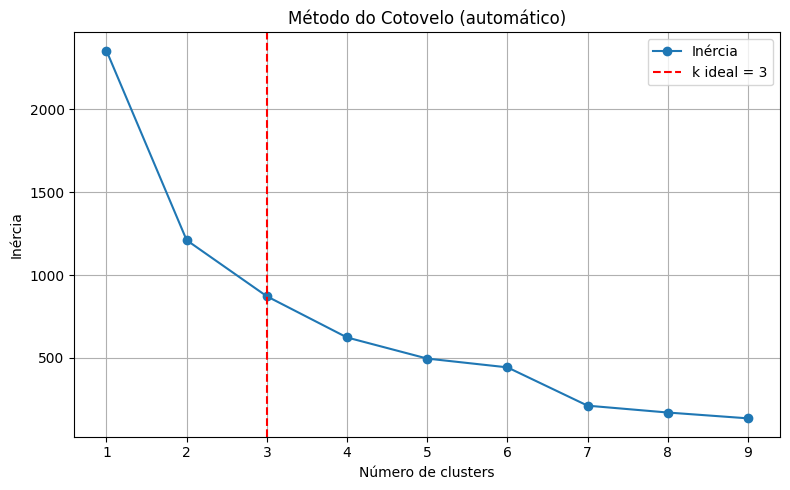

Número ideal de clusters encontrado: 3


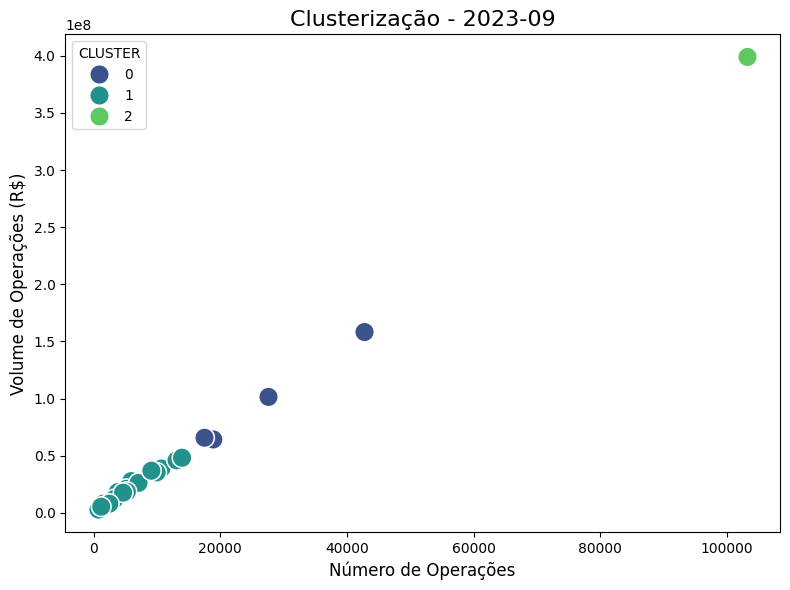

In [34]:
# Criar coluna de mês (ano-mês)
df2['MES'] = df2['DATA_FORMATADA'].dt.to_period('M')

# Agrupar por UF, MÊS e TIPO DESENROLA
df_grouped = df2.groupby(['UNIDADE_FEDERACAO', 'MES', 'TIPO_DESENROLA']).agg({
    'NUMERO_OPERACOES': 'sum',
    'VOLUME_OPERACOES': 'sum'
}).reset_index()

# Método do Cotovelo com detecção automática
scaler = StandardScaler()
X_all = scaler.fit_transform(df_grouped[['NUMERO_OPERACOES', 'VOLUME_OPERACOES']])

inertias = []
max_k = 10
for k in range(1, max_k):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_all)
    inertias.append(km.inertia_)

# Encontrar os "clusters" automaticamente
kneedle = KneeLocator(range(1, max_k), inertias, curve='convex', direction='decreasing')
k = kneedle.elbow

# Plotar gráfico do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_k), inertias, marker='o', label='Inércia')
plt.axvline(k, color='red', linestyle='--', label=f'k ideal = {k}')
plt.title('Método do Cotovelo (automático)')
plt.xlabel('Número de clusters')
plt.ylabel('Inércia')
plt.xticks(range(1, max_k))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Número ideal de clusters encontrado: {k}")

# Fazer clusterização por mês com K ideal
todos_clusters = []

for mes in df_grouped['MES'].unique():
    dados_mes = df_grouped[df_grouped['MES'] == mes].copy()

    # Normalização
    X_scaled = scaler.transform(dados_mes[['NUMERO_OPERACOES', 'VOLUME_OPERACOES']])

    # KMeans com k ideal
    kmeans = KMeans(n_clusters=k, random_state=42)
    dados_mes['CLUSTER'] = kmeans.fit_predict(X_scaled)

    todos_clusters.append(dados_mes)

# Juntar todos os meses
df_clusterizado = pd.concat(todos_clusters)

import seaborn as sns

# Visualizar um mês específico (ex: setembro de 2023)
mes_escolhido = '2023-09'
dados_plot = df_clusterizado[df_clusterizado['MES'] == mes_escolhido]

plt.figure(figsize=(8, 6))

# Paleta viridis com número de clusters
palette_viridis = sns.color_palette("viridis", k)

sns.scatterplot(
    data=dados_plot,
    x='NUMERO_OPERACOES',
    y='VOLUME_OPERACOES',
    hue='CLUSTER',
    palette=palette_viridis,
    s=200
)

# Adicionar nomes das UFs nos pontos (opcional, descomentando abaixo)
# for i in range(dados_plot.shape[0]):
#     plt.text(
#         dados_plot['NUMERO_OPERACOES'].iloc[i],
#         dados_plot['VOLUME_OPERACOES'].iloc[i],
#         dados_plot['UNIDADE_FEDERACAO'].iloc[i],
#         fontsize=10,
#         ha='right'
#     )

plt.title(f'Clusterização - {mes_escolhido}', fontsize=16)
plt.xlabel('Número de Operações', fontsize=12)
plt.ylabel('Volume de Operações (R$)', fontsize=12)
plt.tight_layout()
plt.show()



- Conseguimos 3 Clusters. 
- O cluster 2 está isolado com os maiores valores de operações e número de operações.
- O cluster 1 está com maior frequência de operações mas com bem menos valores e número de operações.
- O cluster 0 está com menos frequência de operações, mas com um pouco mais de valores e números de operações.

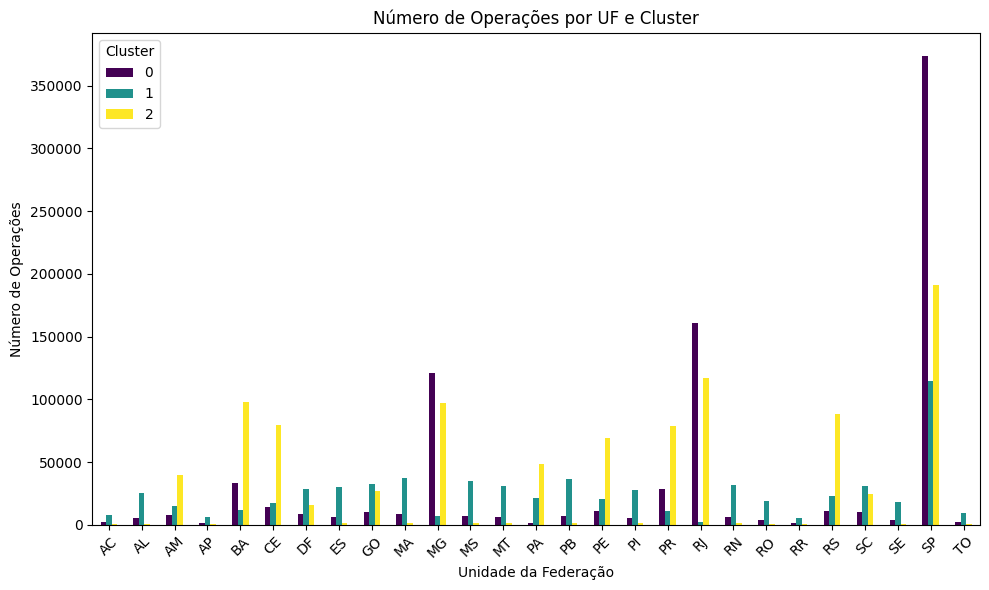

In [35]:
# Agrupando por UF e Cluster, somando as operações
agrupado = df_clusterizado.groupby(["UNIDADE_FEDERACAO", "CLUSTER"])["NUMERO_OPERACOES"].sum().unstack(fill_value=0)

# Plotando com colormap viridis
agrupado.plot(kind='bar', figsize=(10, 6), colormap='viridis')

plt.title("Número de Operações por UF e Cluster")
plt.xlabel("Unidade da Federação")
plt.ylabel("Número de Operações")
plt.legend(title="Cluster")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


SP se destaca com o maior número de operações entre os 3 clusters, onde o cluster 0 é o maior.

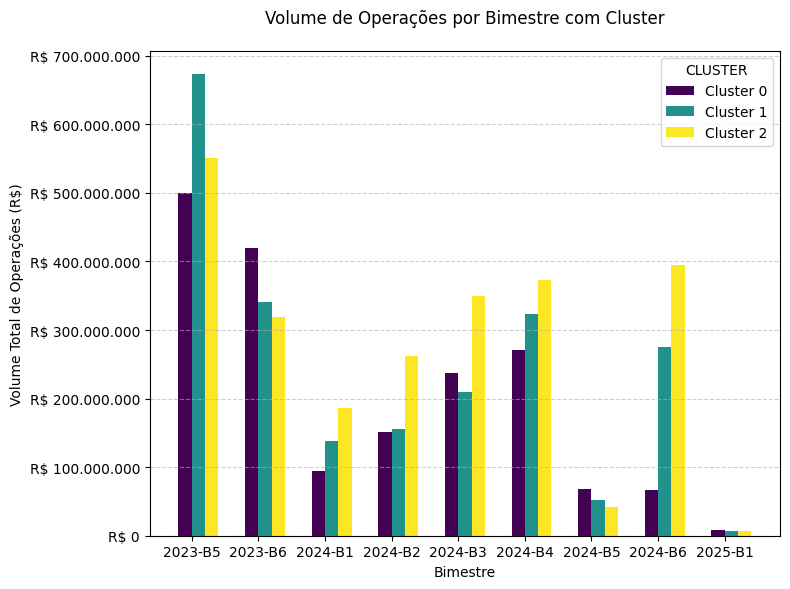

In [36]:
# Criar coluna BIMESTRE
df_clusterizado['BIMESTRE'] = df_clusterizado['MES'].apply(lambda x: f"{x.year}-B{((x.month - 1) // 2) + 1}")

# Agrupar por BIMESTRE e CLUSTER
agrupado = df_clusterizado.groupby(['BIMESTRE', 'CLUSTER'])['VOLUME_OPERACOES'].sum().unstack(fill_value=0)

# Cores viridis para os clusters
clusters = agrupado.columns
viridis = plt.get_cmap('viridis', len(clusters))
cores = [viridis(i) for i in range(len(clusters))]

# Configuração de posições X e largura das barras
x = np.arange(len(agrupado.index)) * 1.5
largura = 0.3

plt.figure(figsize=(8, 6))

# Criar barras
for i, cluster in enumerate(clusters):
    plt.bar(x + i * largura, agrupado[cluster], width=largura, label=f'Cluster {cluster}', color=cores[i])

# Eixo Y formatado em reais
ax = plt.gca()
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, _: f'R$ {x:,.0f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
)

# Ajustes finais
plt.xlabel('Bimestre')
plt.ylabel('Volume Total de Operações (R$)')
plt.title('Volume de Operações por Bimestre com Cluster', pad=20)
plt.xticks(x + largura / 2, agrupado.index)
plt.legend(title='CLUSTER')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- Entre os 3 clusters, o primeiro bimestre do programa se destaca com a maior frequência de volume total de operações, o cluster 1 se destaca com os maiores valores.

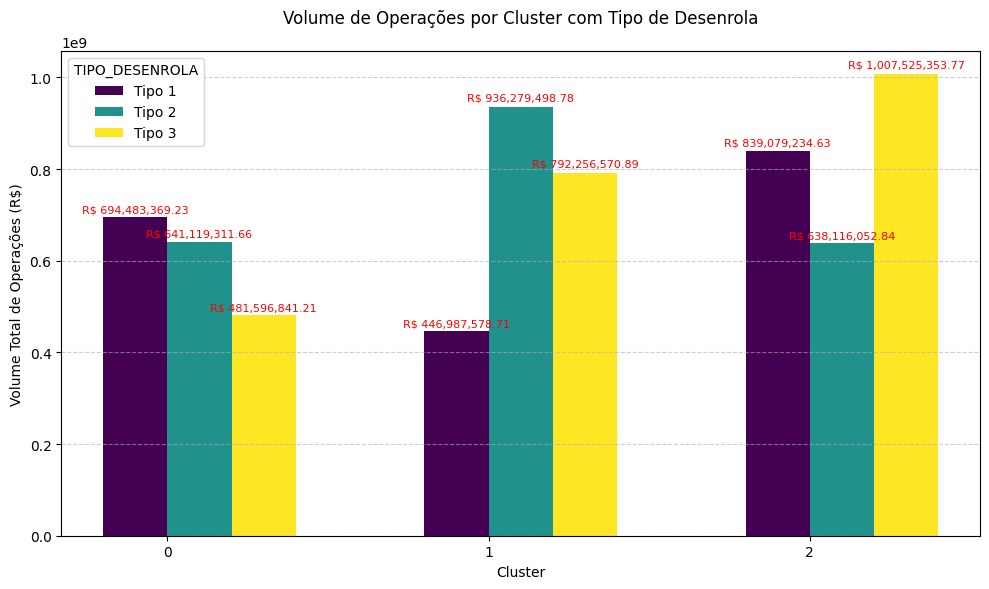

In [37]:
# Agrupar por CLUSTER e TIPO_DESENROLA
agrupado = df_clusterizado.groupby(['CLUSTER', 'TIPO_DESENROLA'])['VOLUME_OPERACOES'].sum().unstack(fill_value=0)

# Cores viridis para cada TIPO_DESENROLA
tipos = agrupado.columns
viridis = plt.get_cmap('viridis', len(tipos))
cores = [viridis(i) for i in range(len(tipos))]

# Configurações de posição e largura
espacamento = 1.5
x = np.arange(len(agrupado.index)) * espacamento
largura = 0.3

plt.figure(figsize=(10, 6))

# Criar barras agrupadas
for i, tipo in enumerate(tipos):
    plt.bar(x + i * largura, agrupado[tipo], width=largura, label=f'Tipo {tipo}', color=cores[i])

# Adicionar rótulos em vermelho
for i, tipo in enumerate(tipos):
    for j, valor in enumerate(agrupado[tipo]):
        offset = valor * 0.01  # 1% da altura da barra
        plt.text(
            x[j] + i * largura,
            valor + offset,
            f'R$ {valor:,.2f}',
            ha='center',
            va='bottom',
            fontsize=8,
            color='red'  # <-- destaque em vermelho
        )

# Eixos e legendas
plt.xlabel('Cluster')
plt.ylabel('Volume Total de Operações (R$)')
plt.title('Volume de Operações por Cluster com Tipo de Desenrola', pad=20)
plt.xticks(x + largura / 2, agrupado.index.astype(str))
plt.legend(title='TIPO_DESENROLA')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


- entre os 3 clusters, o cluster 2 possui os maiores valores totais de operações entre os 3 tipos de desenrola, o tipo 3 se destaca mais.